# AI info French Govermment

In [5]:
# pip install openpyxl
import pandas as pd
news = pd.read_excel("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/AI_eco_gouvFR.xlsx")
news.head()
#research.describe()

,title,description,URL
0,Biocides,modifiant la directive 98/8/CE du Parlement eu...,https://www.economie.gouv.fr/dgccrf/publicatio...
1,Transformation numérique : les aides aux entre...,Francenum.gouv.fr propose des conseils concern...,https://www.economie.gouv.fr/cedef/aides-numer...
2,Rapports 2023,l'industrie de la santé chez Dassault Systèmes...,https://www.economie.gouv.fr/cge/rapports2023
3,Diversité et égalité des chances : Bercy accue...,Besoin en compétences : comment l'immigration ...,https://www.economie.gouv.fr/sommet-inclusion-...
4,Les enjeux de propriété intellectuelle dans l'...,Les enjeux de propriété intellectuelle dans l'...,https://www.economie.gouv.fr/apie/les-enjeux-d...


### Frequency of certain keywords in titles and descriptions.

The bar graphs above display the frequency of selected keywords in the titles and descriptions of the dataset. The first graph shows the counts for each keyword in the titles, while the second graph presents the counts for the descriptions.

This analysis provides an insight into the focus areas of the content published on the French Ministry of Economy, Finance, and Recovery's website. We can observe which topics are more frequently mentioned and potentially identify trends or priorities in the government's communication.

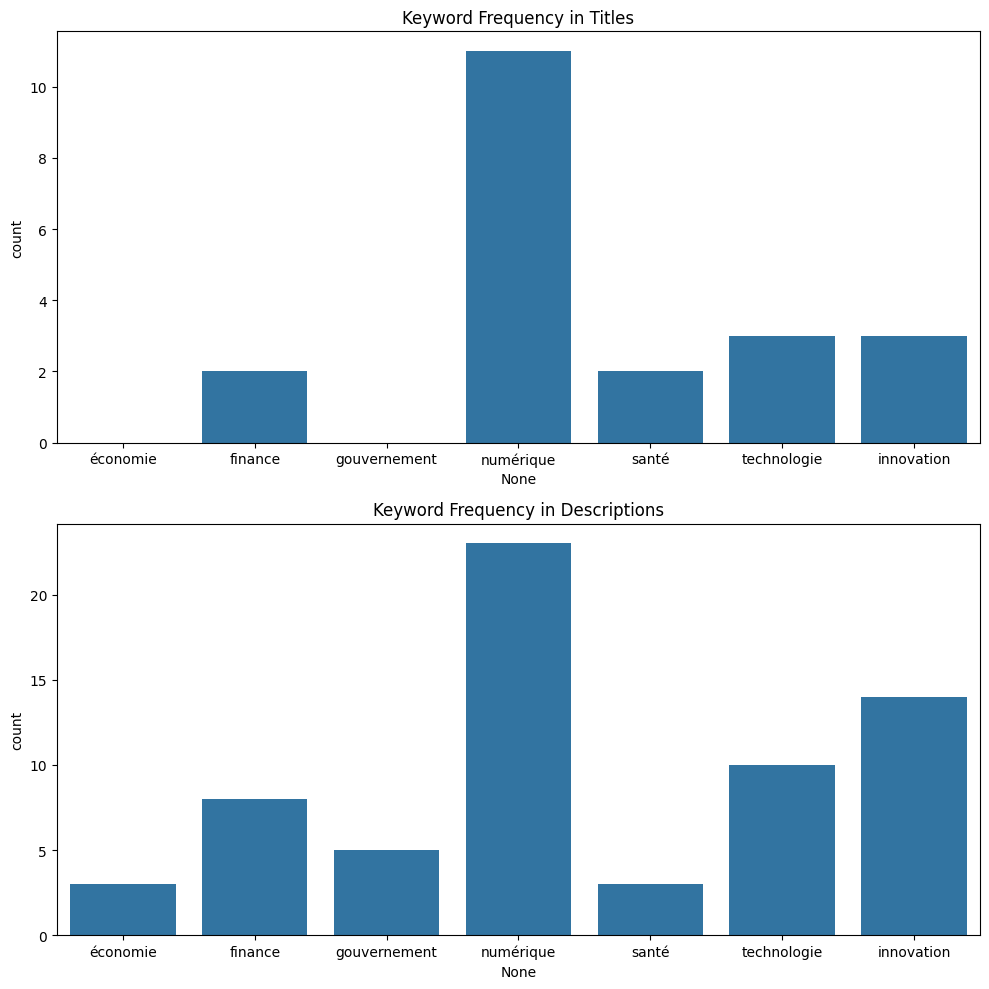

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Selecting keywords for analysis
keywords = ['économie', 'finance', 'gouvernement', 'numérique', 'santé', 'technologie', 'innovation']

# Function to count occurrences of keywords in a text
def count_keywords(text, keywords):
    text = text.lower()
    keyword_counts = Counter()
    for keyword in keywords:
        keyword_counts[keyword] = text.count(keyword)
    return keyword_counts

# Counting occurrences of keywords in titles and descriptions
title_keyword_counts = Counter()
description_keyword_counts = Counter()

for _, row in news.iterrows():
    title_keyword_counts.update(count_keywords(row['title'], keywords))
    description_keyword_counts.update(count_keywords(row['description'], keywords))

# Preparing data for plotting
title_counts_df = pd.DataFrame.from_dict(title_keyword_counts, orient='index', columns=['count'])
description_counts_df = pd.DataFrame.from_dict(description_keyword_counts, orient='index', columns=['count'])

# Plotting the data
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(ax=axes[0], x=title_counts_df.index, y='count', data=title_counts_df)
axes[0].set_title('Keyword Frequency in Titles')
sns.barplot(ax=axes[1], x=description_counts_df.index, y='count', data=description_counts_df)
axes[1].set_title('Keyword Frequency in Descriptions')

plt.tight_layout()
plt.show()


 ### Relationship between the length of the content and its thematic focus.

 The bar graphs above display the average length of titles and descriptions by different content categories. The first graph shows the average title length for each category, and the second graph presents the average description length.

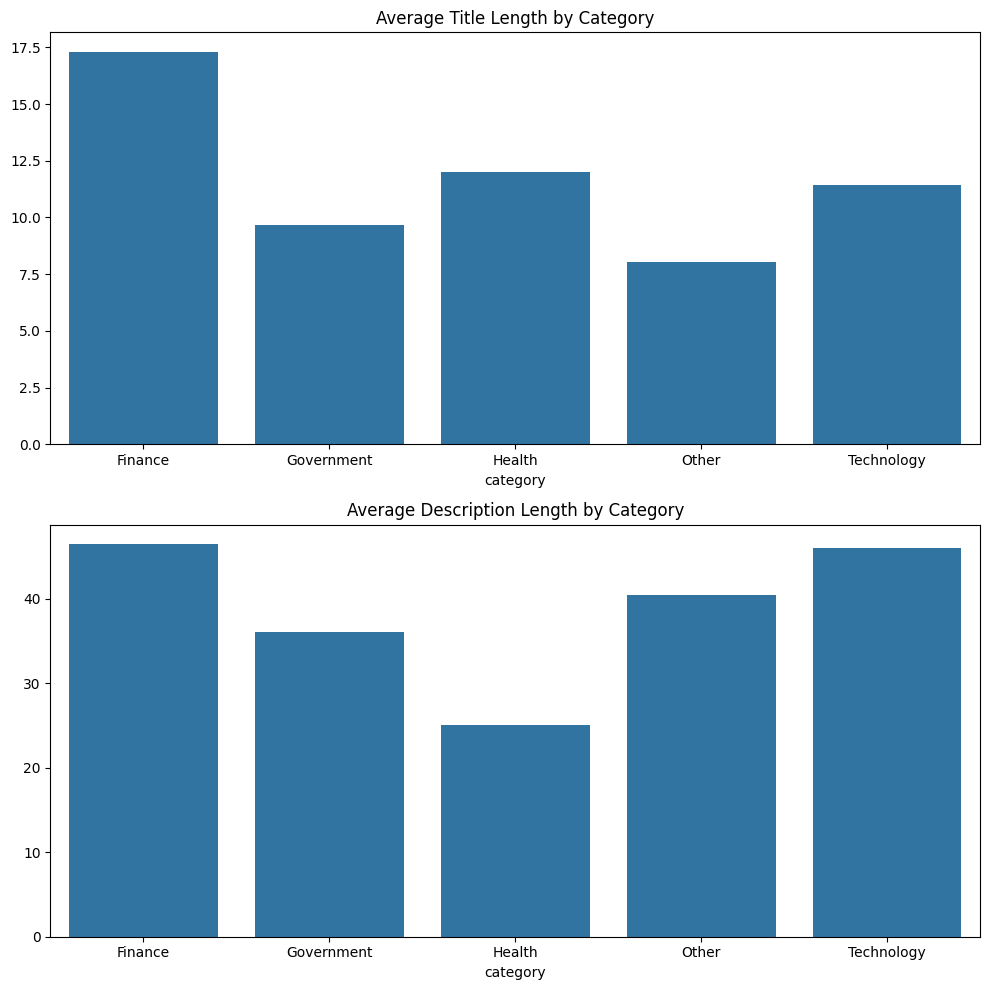

In [10]:
from nltk.tokenize import word_tokenize

# Define categories and their associated keywords
categories = {
    'Finance': ['finance', 'économie', 'budget', 'fiscal'],
    'Technology': ['numérique', 'technologie', 'innovation', 'digital'],
    'Health': ['santé', 'médical', 'soins'],
    'Government': ['gouvernement', 'politique', 'législation', 'régulation']
}

# Function to categorize content based on keywords
def categorize_content(text, categories):
    text = text.lower()
    for category, keywords in categories.items():
        if any(keyword in text for keyword in keywords):
            return category
    return 'Other'

# Simple method to count words in a text
def simple_word_count(text):
    return len(text.split())

# Calculate lengths using the simple method and categorize content
news['title_length'] = news['title'].apply(simple_word_count)
news['description_length'] = news['description'].apply(simple_word_count)
news['category'] = news.apply(lambda x: categorize_content(x['title'] + ' ' + x['description'], categories), axis=1)

# Analyzing the relationship between length and category
average_title_length = news.groupby('category')['title_length'].mean()
average_description_length = news.groupby('category')['description_length'].mean()

# Plotting the data
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(ax=axes[0], x=average_title_length.index, y=average_title_length.values)
axes[0].set_title('Average Title Length by Category')
sns.barplot(ax=axes[1], x=average_description_length.index, y=average_description_length.values)
axes[1].set_title('Average Description Length by Category')

plt.tight_layout()
plt.show()
